<a href="https://colab.research.google.com/github/lauracarbaugh/linear_models_assignment/blob/main/linear_models_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Question 1
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
print(os.path.exists("/content/drive/My Drive/DS3001linearmodels.pdf"))



Mounted at /content/drive
True


In [3]:
# Question 1
from IPython.display import IFrame
FILE_ID = "DS3001linearmodels.pdf"
IFrame(src=f"https://drive.google.com/file/d/1H6hWERkqMJ06t7UPwNX7UiEG-f1eN_06/view?usp=drive_link", width=800, height=600)
# answers found at the link

In [4]:
! git clone https://github.com/lauracarbaugh/linear_models_assignment.git

Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (9/9), 18.05 KiB | 9.02 MiB/s, done.


In [5]:
!git config --global user.name "lauracarbaugh"
!git config --global user.email "rnr7tu@virginia.edu"

In [6]:
cd linear_models_assignment/

/content/linear_models_assignment


In [7]:
cd data/

/content/linear_models_assignment/data


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Question 3.1
heart = pd.read_csv('heart_hw.csv')
heart.head()

# calculate proportion of people who survive in the control group
control = heart[heart['transplant'] == 'control']
survive_control = control['y'].mean()

# calc proportion of people who survive in the treatment group
treatment_group = heart[heart['transplant'] == 'treatment']
survive_treatment = treatment_group['y'].mean()

# calc average treatment effect as difference in survival proportions
diff_survival = survive_treatment - survive_control

print(survive_control)
print(survive_treatment)
print(diff_survival)

0.11764705882352941
0.34782608695652173
0.23017902813299232


In [10]:
# Question 3.2
from sklearn.linear_model import LinearRegression

# convert transplant to a binary indicator
# control=0, treatment=1
heart['transplant_binary'] = (heart['transplant'] == 'treatment').astype(int)

# define independent var x with a constant/dependent y
X = heart[['transplant_binary']]
y = heart['y']

# fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# make intercept and coefficient
intercept = model.intercept_
coef_transplant = model.coef_[0]

print(intercept)
print(coef_transplant)


0.1176470588235293
0.23017902813299249


Question 3.2: From the regression model, the intercept represents the average survival rate in the control group, which exactly matches with the proportion of survivors in the control group from Q3.1. The coefficient on transplant represents the difference in means between the treatment and controrl groups (the average treatment effect). This matches the difference in survival proportions from Q3.1.

In [11]:
# Question 3.3
X = heart[['transplant_binary', 'age']]
y = heart['y']

# create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# extract intercept and coefficients
intercept = model.intercept_
coef_transplant = model.coef_[0]
coef_age = model.coef_[1]

print(intercept)
print(coef_transplant)
print(coef_age)

0.7019569721740947
0.2647016865036751
-0.013607217160218647


Question 3.3: The intercept increased substantially from 0.118 to 0.702 when age was added to the model. This means that the intercept represents the predicted probability for a control group patient of age 0. The change in intercept means that it is now the predicted survival of a newborn patient rather than the average survival of all controls.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


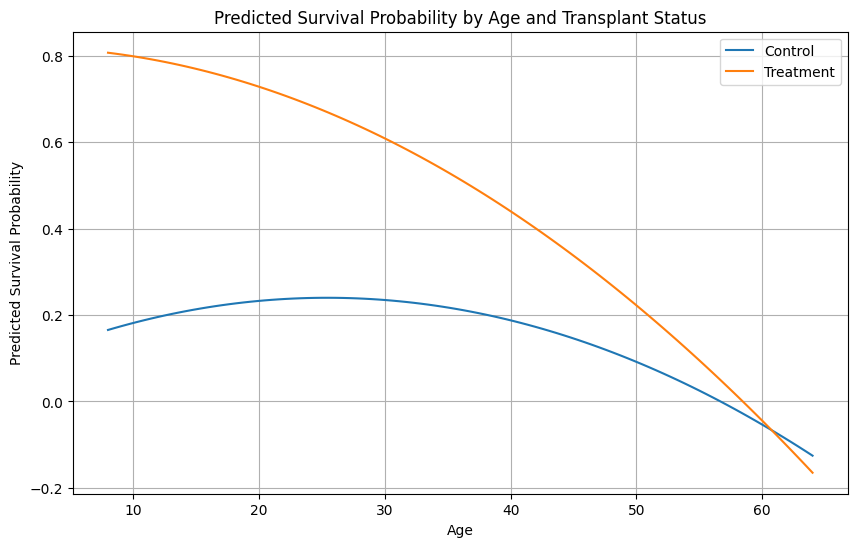

In [12]:
# Question 3.4

from sklearn.model_selection import train_test_split

# create interaction and non-linear terms
heart['age_squared'] = heart['age'] ** 2
heart['interaction'] = heart['transplant_binary'] * heart['age']

# define feature set with transplant, age, age sqd, interaction
X = heart[['transplant_binary', 'age', 'age_squared', 'interaction']]
y = heart['y']

# split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# predict survival probability over a range of ages for treatment and control
ages = np.linspace(heart['age'].min(), heart['age'].max(), 100)
treatment = 1
control = 0

# helper function to create design matrix for prediction
def create_design_matrix(transplant_value):
    age_sq = ages ** 2
    interaction_term = transplant_value * ages
    df_pred = np.column_stack((np.full_like(ages, transplant_value), ages, age_sq, interaction_term))
    return df_pred

X_pred_treatment = create_design_matrix(treatment)
X_pred_control = create_design_matrix(control)

# predict survival probabilities
y_pred_treatment = model.predict(X_pred_treatment)
y_pred_control = model.predict(X_pred_control)

# plot results
plt.figure(figsize=(10,6))
plt.plot(ages, y_pred_control, label='Control')
plt.plot(ages, y_pred_treatment, label='Treatment')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability by Age and Transplant Status')
plt.legend()
plt.grid(True)
plt.show()

Question 3.4: Based on the plot, Treatment shows higher survival prpobabilities overall than the Control group, which means that transplant recipients are expected to survive longer on average. Both lines decrease as age increases which makes sense given that older patients are less likely to survive. The curving nature indicates that the relationship between age and predicted survival probability is non-linear.

Question 3.5: An issue that I would be concerned about is basing medical decisions solely on model suggestions. Using non-linear data can be hard to interpret for doctors and policymakers, which could create an issue in prioritizing the right people. Also, reducing medical profiles to a list of characteristics and a survival probability leaves people vulnerable to being de-prioritized. If the model is only trained on one hospital, this is not generalized to a broader population which can create issues with the application of the model and can lead to inaccurate predictions. Using medical data from patients can also contribute to privacy and security concerns.